<a href="https://colab.research.google.com/github/barthelemyleveque/smiling-people/blob/master/infer/Smiling_People_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Smile Detector

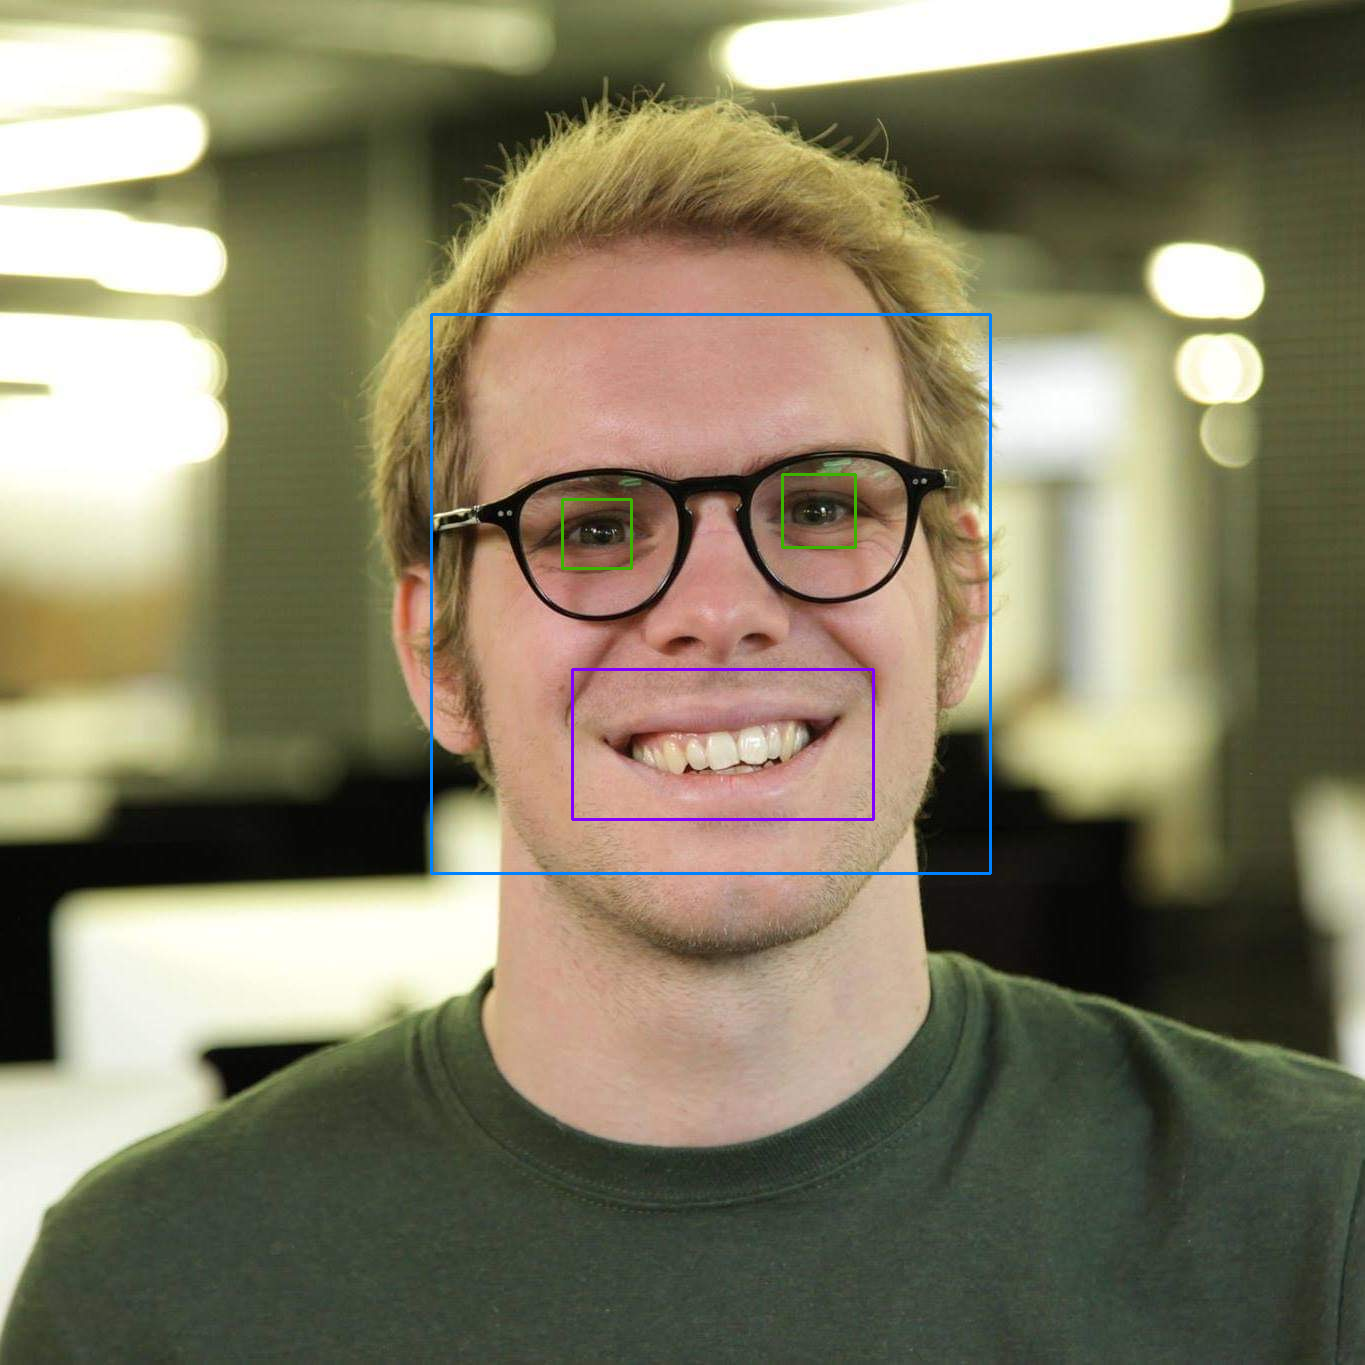

In [0]:
#Source: https://towardsdatascience.com/facial-recognition-happiness-bbb3c4293d1d

import requests
import cv2
from google.colab.patches import cv2_imshow

cascade_eye = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cascade_smile = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

def detection(grayscale, img):
    face = cascade_face.detectMultiScale(grayscale, 1.3, 5)
    for (x_face, y_face, w_face, h_face) in face:
        cv2.rectangle(img, (x_face, y_face), (x_face+w_face, y_face+h_face), (255, 130, 0), 2)
        ri_grayscale = grayscale[y_face:y_face+h_face, x_face:x_face+w_face]
        ri_color = img[y_face:y_face+h_face, x_face:x_face+w_face] 
        eye = cascade_eye.detectMultiScale(ri_grayscale, 1.2, 18) 
        for (x_eye, y_eye, w_eye, h_eye) in eye:
            cv2.rectangle(ri_color,(x_eye, y_eye),(x_eye+w_eye, y_eye+h_eye), (0, 180, 60), 2) 
        smile = cascade_smile.detectMultiScale(ri_grayscale, 1.7, 20)
        for (x_smile, y_smile, w_smile, h_smile) in smile: 
            cv2.rectangle(ri_color,(x_smile, y_smile),(x_smile+w_smile, y_smile+h_smile), (255, 0, 130), 2)
    return img 


grayscale1 = cv2.imread('Smile7.jpg',0)
img1 = cv2.imread('Smile7.jpg')

final=detection(grayscale1,img1)
cv2_imshow(final)

# Deep Learning Algorithm Smile Detection

## Training Model

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
x_train shape: (12180, 48, 48, 1)
12180 train samples
1502 dev samples
1505 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 12180 samples, validate on 1502 samples
Epoch 1/50





12180/12180 [==============================] - 15s 1ms/step - loss: 0.6743 - acc: 0.5897 -

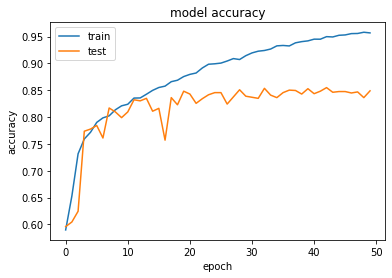

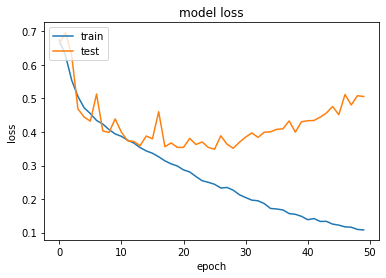

Test loss: 0.45951223409057057
Test accuracy: 0.8697674418604651


In [0]:
from __future__ import print_function
from google.colab import drive
drive.mount('/content/gdrive')

# keras imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

# python imports
import numpy as np


batch_size = 128
num_classes = 2
epochs = 50
logging = True

# input image dimensions
img_rows, img_cols = 48, 48

# the data, shuffled and split between train and test sets
x_train = []
y_train = []
x_dev= []
y_dev = []
x_test = []
y_test = []

#Consider opening straight from Kaggle -For now opening from Google Drive
with open('/content/gdrive/My Drive/Smiling People/fer2013.csv') as file:
    lines = file.read().split('\n')[1:]
    lines.remove('')

    for line in lines:
        emotion, pixels, usage = line.split(',')
        if not (emotion == '6' or emotion == '3'):
            continue
        if emotion == '6':
            emotion = 0
        if emotion == '3':
            emotion = 1

        if usage == 'Training':
            x, y = x_train, y_train
        elif usage == 'PrivateTest':
            x, y = x_test, y_test
        elif usage == 'PublicTest':
            x, y = x_dev, y_dev 
        else:
            continue

        pixels = [int(p) for p in pixels.split(' ')]
        x.append(np.array(pixels))
        y.append(emotion)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_dev = np.array(x_dev)
y_dev = np.array(y_dev)
x_test = np.array(x_test)
y_test = np.array(y_test)

# flexibility in case of different backends (support different backends)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_dev = x_dev.reshape(x_dev.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_dev = x_dev.reshape(x_dev.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_dev = x_dev.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_dev /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_dev.shape[0], 'dev samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_dev = keras.utils.to_categorical(y_dev, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# initializing model
model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# for w in model.get_weights():
#     print(w.shape)

# save the model after every epoch
checkpointer = keras.callbacks.ModelCheckpoint(
    'models/model.h5',
    save_best_only = True,
    monitor = 'val_acc',
    mode = 'auto',
    verbose = 1
)

history_callback = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[checkpointer],
          validation_data=(x_dev, y_dev)
          )

if logging:
    # # write loss log on file
    # loss_history = history_callback.history["loss"]
    # f = open("loss_reports.txt", "w")
    # for loss in loss_history:
    #     f.write('%s\n' %loss)

    # list all data in history
    print(history_callback.history.keys())
    # summarize history for accuracy
    plt.plot(history_callback.history['acc'])
    plt.plot(history_callback.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_callback.history['loss'])
    plt.plot(history_callback.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Predicting

{'border': {'x': 211.0, 'y': 75.0, 'width': 115.0, 'height': 115.0}, 'prediction': {'happiness': 0.0, 'neutral': 1.0}, 'emotion': 'happiness'}


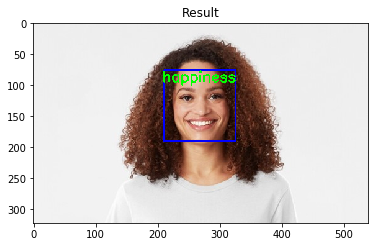

0.20711016654968262
{'border': {'x': 54.0, 'y': 73.0, 'width': 119.0, 'height': 119.0}, 'prediction': {'happiness': 0.0, 'neutral': 1.0}, 'emotion': 'happiness'}


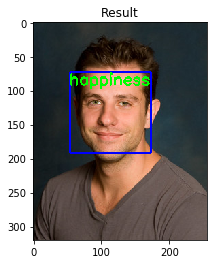

0.08920884132385254
{'border': {'x': 178.0, 'y': 66.0, 'width': 180.0, 'height': 180.0}, 'prediction': {'happiness': 0.0, 'neutral': 1.0}, 'emotion': 'happiness'}


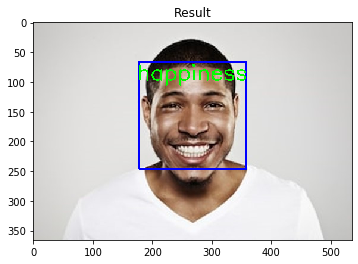

0.10741114616394043
{'border': {'x': 618.0, 'y': 160.0, 'width': 247.0, 'height': 247.0}, 'prediction': {'happiness': 0.0, 'neutral': 1.0}, 'emotion': 'happiness'}


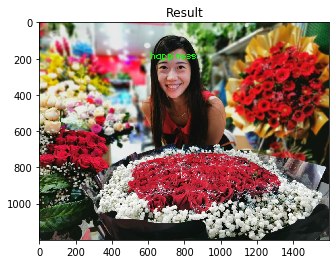

1.5036993026733398
{'border': {'x': 447.0, 'y': 115.0, 'width': 178.0, 'height': 178.0}, 'prediction': {'happiness': 0.0, 'neutral': 1.0}, 'emotion': 'happiness'}


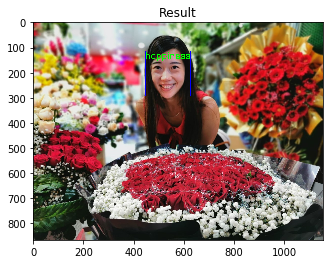

0.9097626209259033
{'border': {'x': 132.0, 'y': 213.0, 'width': 259.0, 'height': 259.0}, 'prediction': {'happiness': 0.0, 'neutral': 1.0}, 'emotion': 'happiness'}


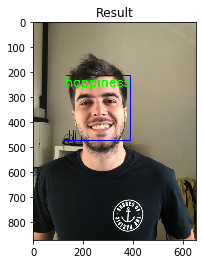

0.25946593284606934


In [0]:
import sys
import cv2
from keras.models import load_model
from matplotlib import pyplot as plt
import time


model = load_model("models/model.h5")


def find_faces(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    face_rects = face_cascade.detectMultiScale(
        image,
        scaleFactor = 1.1,
        minNeighbors = 22
    )
    return face_rects


def load_image(filepath):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image, gray_image


def predict(gray_image):
    face_rects = find_faces(gray_image)

    for face_rect in face_rects:
        x, y, w, h = face_rect
        face = gray_image[y:y+h, x:x+w]

        face = cv2.resize(face, (48, 48)).reshape((1, 48, 48, 1))
        predicted_emotions = model.predict(face)[0]
        best_emotion = 'happiness' if predicted_emotions[1] > predicted_emotions[0] else 'neutral'

        # Create a json serializable result
        yield dict(
            border = dict(
                x = float(x),
                y = float(y),
                width = float(w),
                height = float(h),
            ),
            prediction = {'happiness': float(predicted_emotions[0]), 'neutral': float(predicted_emotions[1])},
            emotion = best_emotion
        )


def put_text(image, rect, text):
    x, y, w, h = rect

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = h / 30.0
    font_thickness = int(round(font_scale * 2))
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)

    center_text_x = x + (w // 2)
    center_text_y = y + (h // 2)
    text_w, text_h = text_size

    lower_left_text_x = center_text_x - (text_w // 2)
    lower_left_text_y = center_text_y + (text_h // 2)

    cv2.putText(
        image, text,
        (lower_left_text_x, lower_left_text_y),
        font, font_scale, (0, 255, 0), font_thickness
    )


def draw_face_info(image, face_info):
    x = int(face_info['border']['x'])
    y = int(face_info['border']['y'])
    w = int(face_info['border']['width'])
    h = int(face_info['border']['height'])
    emotion = face_info['emotion']

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    put_text(image, (x, y, w, h // 5), emotion)


def show_image(image, title='Result'):
    plt.subplot(111), plt.imshow(image), plt.title(title)
    plt.show()



'''
if __name__ == '__main__':
    
    # start time
    start_time = time.time()
    image, gray_image = load_image(sys.argv[1])

    for face_info in predict(gray_image):
        print(face_info)
        draw_face_info(image, face_info)
    # end time
    end_time = time.time()
    show_image(image)

    response_time = end_time - start_time
    print(response_time)
'''

for i in range(1,7):

  start_time = time.time()
  image, gray_image = load_image('Smile'+str(i)+'.jpg')

  for face_info in predict(gray_image):
      print(face_info)
      draw_face_info(image, face_info)
  # end time
  end_time = time.time()
  show_image(image)

  response_time = end_time - start_time
  print(response_time)

# TESTS


In [0]:

from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
